[IPython Notebook](ETV.ipynb) |  [Python Script](ETV.py)

ETV Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Dataset Parameters
--------------------------

Let's create the ParameterSet which would be added to the Bundle when calling add_dataset. Later we'll call add_dataset, which will create and attach this ParameterSet for us.

In [3]:
ps, constraints = phoebe.dataset.etv(component='mycomponent')
print ps

ParameterSet: 5 parameters
                     Ns@_default: []
              time_ecls@_default: [] d
            time_ephems@_default: [] d
                   etvs@_default: [] d
                          sigmas: [] d


Currently, none of the available etv methods actually compute fluxes.  But if one is added that computes a light-curve and actually finds the time of mid-eclipse, then the passband-dependend parameters will be added here.

For information on these passband-dependent parameters, see the section on the [LC Dataset](LC)

### Ns

In [4]:
print ps['Ns']

Parameter: Ns@_default
                       Qualifier: Ns
                     Description: Epoch since t0
                           Value: []
                  Constrained by: 
                      Constrains: None
                      Related to: None



### time_ephems

NOTE: this parameter will be constrained when added through add_dataset

In [5]:
print ps['time_ephems']

Parameter: time_ephems@_default
                       Qualifier: time_ephems
                     Description: Expected time of eclipse from the current ephemeris
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### time_ecls

In [6]:
print ps['time_ecls']

Parameter: time_ecls@_default
                       Qualifier: time_ecls
                     Description: Time of eclipse
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### etvs

NOTE: this parameter will be constrained when added through add_dataset

In [7]:
print ps['etvs']

Parameter: etvs@_default
                       Qualifier: etvs
                     Description: Eclipse timing variation (time_obs - time_ephem)
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### sigmas

In [8]:
print ps['sigmas']

Parameter: sigmas
                       Qualifier: sigmas
                     Description: Observed uncertainty on time_obs
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to the ETV dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [ORB dataset](ORB)

In [10]:
ps_compute = phoebe.compute.phoebe()
print ps_compute

ParameterSet: 24 parameters
                enabled@_default: True
                 dynamics_method: keplerian
                            ltte: False
                              gr: False
                        stepsize: 0.01
                      integrator: ias15
                            refl: False
                       protomesh: False
                          pbmesh: False
            mesh_method@_default: marching
                  delta@_default: 0.1
              maxpoints@_default: 100000
      distortion_method@_default: roche
               gridsize@_default: 40
                     mesh_offset: True
                  eclipse_method: native
                    atm@_default: ck2004
              lc_method@_default: numerical
             fti_method@_default: None
  fti_oversample@_default@_de...: 5
     rv_method@_default@_default: flux-weighted
       rv_grav@_default@_default: False
    etv_method@_default@_default: crossing
       etv_tol@_default@_default: 0.0001

### etv_method

In [11]:
print ps_compute['etv_method']

Parameter: etv_method@_default@_default
                       Qualifier: etv_method
                     Description: Method to use for computing ETVs
                           Value: crossing
                         Choices: crossing



### etv_tol

In [12]:
print ps_compute['etv_tol']

Parameter: etv_tol@_default@_default
                       Qualifier: etv_tol
                     Description: Precision with which to determine eclipse timings
                           Value: 0.0001 d
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: etv_method:crossing



Synthetics
------------------

In [13]:
b.add_dataset('etv', Ns=np.linspace(0,10,11), dataset='etv01')

<ParameterSet: 13 parameters | contexts: dataset, constraint>

In [14]:
b.add_compute()

<ParameterSet: 22 parameters | components: primary, secondary>

In [15]:
b.run_compute()

<ParameterSet: 8 parameters | components: primary, secondary>

In [16]:
b['etv@model'].twigs

['Ns@primary@etv01@phoebe01@latest@etv@model',
 'time_ecls@primary@etv01@phoebe01@latest@etv@model',
 'time_ephems@primary@etv01@phoebe01@latest@etv@model',
 'etvs@primary@etv01@phoebe01@latest@etv@model',
 'Ns@secondary@etv01@phoebe01@latest@etv@model',
 'time_ecls@secondary@etv01@phoebe01@latest@etv@model',
 'time_ephems@secondary@etv01@phoebe01@latest@etv@model',
 'etvs@secondary@etv01@phoebe01@latest@etv@model']

In [17]:
print b['time_ephems@primary@etv@model']

Parameter: time_ephems@primary@latest@model
                       Qualifier: time_ephems
                     Description: Expected time of eclipse from the current ephemeris
                           Value: [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [18]:
print b['time_ecls@primary@etv@model']

Parameter: time_ecls@primary@latest@model
                       Qualifier: time_ecls
                     Description: Time of eclipse
                           Value: [ -4.27380296e-29   3.00000000e+00   6.00000000e+00   9.00000000e+00
   1.20000000e+01   1.50000000e+01   1.80000000e+01   2.10000000e+01
   2.40000000e+01   2.70000000e+01   3.00000000e+01] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [19]:
print b['etvs@primary@etv@model']

Parameter: etvs@primary@latest@model
                       Qualifier: etvs
                     Description: Eclipse timing variation (time_obs - time_ephem)
                           Value: [ -4.27380296e-29   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, ETV datasets plot as etv vs time_ephem.  Of course, a simple binary with no companion or apsidal motion won't show much of a signal (this is essentially flat with some noise).  To see more ETV examples see:

* [Apsidal Motion](../examples/apsidal_motion)
* [Minimial Hierarchical Triple](../examples/hierarchical_triple)
* [LTTE ETVs in a Hierarchical Triple](../examples/hierarchical_triple_etvs)

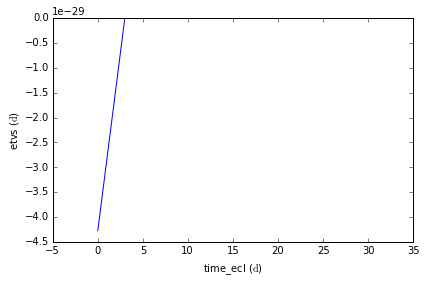

In [20]:
axs, artists = b['etv@model'].plot()

Alternatively, especially when overplotting with a light curve, its sometimes handy to just plot ticks at each of the eclipse times.  This can easily be done by passing a single value for 'y'.

For other examples with light curves as well see:
* [Apsidal Motion](../examples/apsidal_motion)
* [LTTE ETVs in a Hierarchical Triple](../examples/hierarchical_triple_etvs)



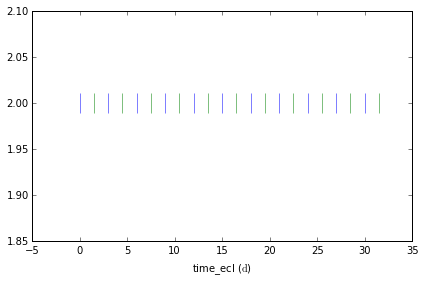

In [21]:
axs, artists = b['etv@model'].plot(x='time_ecls', y=2)